# Comparando dois Estados

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

Entrando com o nome dos Estados

In [4]:
arquivo = pd.read_csv('covid19.csv', usecols=[0, 1, 3, 4, 6, 7, 9, 10]) #lendo o arquivo e selecionando as partes que considero importante

In [5]:
estado1 = input('Digite a SIGLA do primeiro estado: ')
estado1 = estado1.upper()
dados_estado1 = arquivo[arquivo.state == estado1]
while dados_estado1.empty:
    print('Estado {} não existe!'.format(estado1))
    estado1 = input('Digite a SIGLA do primeiro estado: ')
    estado1 = estado1.upper()
    dados_estado1 = arquivo[arquivo.state == estado1]

Digite a SIGLA do primeiro estado: AL


In [6]:
estado2 = input('Digite a SIGLA do segundo estado: ')
estado2 = estado2.upper()
dados_estado2 = arquivo[arquivo.state == estado2]
while dados_estado2.empty:
    print('Estado {} não existe!'.format(estado2))
    estado2 = input('Digite a SIGLA do primeiro estado: ')
    estado2 = estado2.upper()
    dados_estado2 = arquivo[arquivo.state == estado2]

Digite a SIGLA do segundo estado: GO


Selecionando os dados de comparação do primeiro Estado

In [7]:
ultimo = dados_estado1.epidemiological_week.iloc[0]
dados = dados_estado1[dados_estado1.epidemiological_week == ultimo]
estado1_casos_semana = []
estado1_mortes_semana = []
datas_estado1 = []

In [8]:
confirmados1, mortes1, i = 0, 0, 0
for linha in range(0, 7):
    for dia in dados:
        confirmados1 += dados.last_available_confirmed.iloc[i]
        mortes1 += dados.last_available_deaths.iloc[i]
        i += 1
    estado1_casos_semana.append(confirmados1)
    estado1_mortes_semana.append(mortes1)
    datas_estado1.append(ultimo)
    acu, i = 0, 0
    ultimo -= 1
    dados = dados_estado1[dados_estado1.epidemiological_week == ultimo]

Selecionando os dados de comparação do segundo estado

In [9]:
ultimo = dados_estado2.epidemiological_week.iloc[0]
dados = dados_estado2[dados_estado2.epidemiological_week == ultimo]
estado2_casos_semana = []
estado2_mortes_semana = []
datas_estado2 = []

In [10]:
confirmados2, mortes2, i = 0, 0, 0
for linha in range(0, 7):
    for dia in dados:
        confirmados2 += dados.last_available_confirmed.iloc[i]
        mortes2 += dados.last_available_deaths.iloc[i]
        i += 1
    estado2_casos_semana.append(confirmados2)
    estado2_mortes_semana.append(mortes2)
    datas_estado2.append(ultimo)
    acu, i = 0, 0
    ultimo -= 1
    dados = dados_estado2[dados_estado2.epidemiological_week == ultimo]

Plotando o gráfico de comparação usando os dados coletados

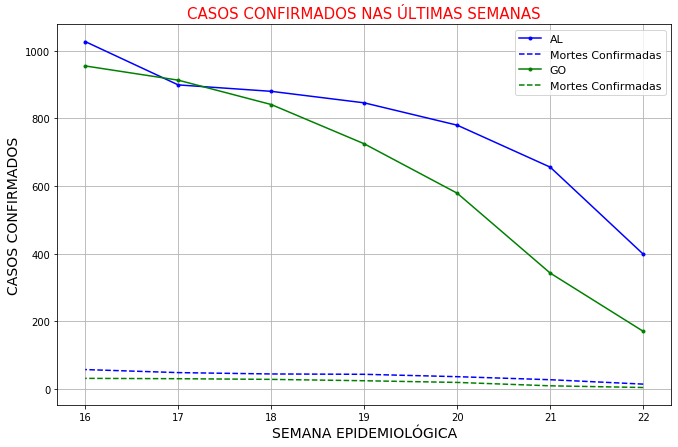

In [11]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(datas_estado1, estado1_casos_semana, 'b.-', label=estado1)
plt.plot(datas_estado1, estado1_mortes_semana, 'b--', label='Mortes Confirmadas')
plt.plot(datas_estado2, estado2_casos_semana, 'g.-', label=estado2)
plt.plot(datas_estado2, estado2_mortes_semana, 'g--', label='Mortes Confirmadas')
plt.legend(fontsize = 11)
plt.grid()
plt.title('CASOS CONFIRMADOS NAS ÚLTIMAS SEMANAS', fontsize = 15, color= 'red')
plt.xlabel('SEMANA EPIDEMIOLÓGICA', fontsize = 14)
plt.ylabel('CASOS CONFIRMADOS', fontsize = 14)
plt.show()

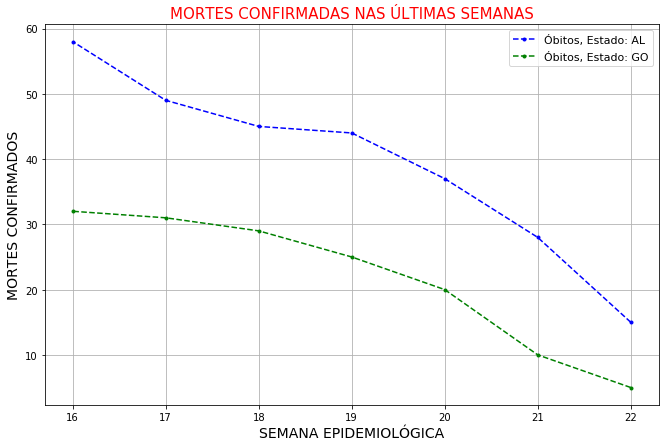

In [12]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(datas_estado1, estado1_mortes_semana, 'b.--', label='Óbitos, Estado: {}'.format(estado1))
plt.plot(datas_estado2, estado2_mortes_semana, 'g.--', label='Óbitos, Estado: {}'.format(estado2))
plt.legend(fontsize = 11)
plt.grid()
plt.title('MORTES CONFIRMADAS NAS ÚLTIMAS SEMANAS', fontsize = 15, color= 'red')
plt.xlabel('SEMANA EPIDEMIOLÓGICA', fontsize = 14)
plt.ylabel('MORTES CONFIRMADOS', fontsize = 14)
plt.show()

In [13]:
print('---------- {} ----------'.format(estado1))
print('Casos: {}'.format(estado1_casos_semana))
print('Óbitos: {}'.format(estado1_mortes_semana))
print('Semana: {}'.format(datas_estado1))

---------- AL ----------
Casos: [399, 656, 780, 846, 880, 899, 1027]
Óbitos: [15, 28, 37, 44, 45, 49, 58]
Semana: [22, 21, 20, 19, 18, 17, 16]


In [14]:
print('---------- {} ----------'.format(estado2))
print('Casos: {}'.format(estado2_casos_semana))
print('Óbitos: {}'.format(estado2_mortes_semana))
print('Semana: {}'.format(datas_estado2))

---------- GO ----------
Casos: [171, 343, 579, 725, 841, 913, 955]
Óbitos: [5, 10, 20, 25, 29, 31, 32]
Semana: [22, 21, 20, 19, 18, 17, 16]


# Comparando duas Cidades

In [20]:
cidade1 = input('Digite o nome da primeira Cidade: ')
dados_cidade1 = arquivo[arquivo.city == cidade1]
while dados_cidade1.empty:
    print('A cidade {} não existe!'.format(cidade1))
    cidade1 = input('Digite a sigla da primeira Cidade: ')
    dados_cidade1 = arquivo[arquivo.city == cidade1]

Digite o nome da primeira Cidade: Borba


In [21]:
cidade2 = input('Digite o nome da segunda Cidade: ')
dados_cidade2 = arquivo[arquivo.city == cidade2]
while dados_cidade2.empty:
    print('A cidade {} não existe!'.format(cidade2))
    cidade2 = input('Digite a sigla da segunda Cidade: ')
    dados_cidade2 = arquivo[arquivo.city == cidade2]

Digite o nome da segunda Cidade: Coari


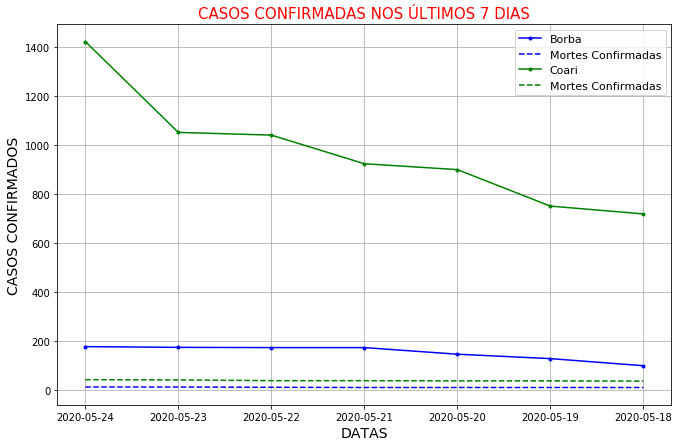

In [22]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(dados_cidade1.date[:7], dados_cidade1.last_available_confirmed[:7], 'b.-', label=cidade1)
plt.plot(dados_cidade1.date[:7], dados_cidade1.last_available_deaths[:7], 'b--', label='Mortes Confirmadas')
plt.plot(dados_cidade2.date[:7], dados_cidade2.last_available_confirmed[:7], 'g.-', label=cidade2)
plt.plot(dados_cidade2.date[:7], dados_cidade2.last_available_deaths[:7], 'g--', label='Mortes Confirmadas')
plt.legend(fontsize = 11)
plt.grid()
plt.title('CASOS CONFIRMADAS NOS ÚLTIMOS 7 DIAS', fontsize = 15, color= 'red')
plt.xlabel('DATAS', fontsize = 14)
plt.ylabel('CASOS CONFIRMADOS', fontsize = 14)
plt.show()

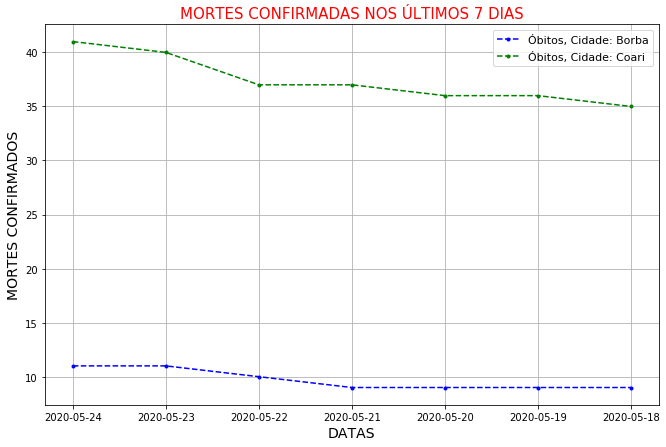

In [23]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.plot(dados_cidade1.date[:7], dados_cidade1.last_available_deaths[:7], 'b.--', label='Óbitos, Cidade: {}'.format(cidade1))
plt.plot(dados_cidade2.date[:7], dados_cidade2.last_available_deaths[:7], 'g.--', label='Óbitos, Cidade: {}'.format(cidade2))
plt.legend(fontsize = 11)
plt.grid()
plt.title('MORTES CONFIRMADAS NOS ÚLTIMOS 7 DIAS', fontsize = 15, color= 'red')
plt.xlabel('DATAS', fontsize = 14)
plt.ylabel('MORTES CONFIRMADOS', fontsize = 14)
plt.show()